# Universidad Nacional de Loja
- Jhandry Santiago Chimbo Rivera
- **Data Mining**

### 📦 1. Carga y previsualización de los datos

In [1]:
import pandas as pd
import gender_guesser.detector as gender

# Cargar los datos de ambas semanas
semana1 = pd.read_csv("semana1.csv")
semana2 = pd.read_csv("semana2.csv")

# Unir ambos dataframes
df = pd.concat([semana1, semana2], ignore_index=True)

# Mostrar las primeras filas
df.head()


,id,created_time,ad_id,ad_name,adset_id,adset_name,campaign_id,campaign_name,form_id,form_name,...,platform,nivel_académico,¿en_qué_franja_horaria_podemos_contactarte?,medio_de_contacto,nombre,apellido,número_de_teléfono,ciudad,correo_electrónico,lead_status
0,4178648972406895,2025-06-20T05:42:47-05:00,120225505390030192,Nuevo anuncio de Clientes potenciales,as:120225505390020192,Clientes potenciales Ventas matriz,120225505390040192,Nueva campaña de Clientes potenciales,698304299663609,Ventas matriz,...,ig,tercer_nivel_/universitario_-_grado,noche,mensaje_whatsapp,alex,pin,593984669751,Tulcán,alexander.pinchao@gmail.com,complete
1,1726958888189304,2025-06-19T22:59:54-05:00,120225505390030192,Nuevo anuncio de Clientes potenciales,as:120225505390020192,Clientes potenciales Ventas matriz,120225505390040192,Nueva campaña de Clientes potenciales,698304299663609,Ventas matriz,...,fb,tercer_nivel_/universitario_-_grado,noche,mensaje_whatsapp,Luis,Macias,593980949677,Guayaquil,luismiguel_macias@hotmail.com,complete
2,1064584195604797,2025-06-19T19:19:08-05:00,120225505390030192,Nuevo anuncio de Clientes potenciales,as:120225505390020192,Clientes potenciales Ventas matriz,120225505390040192,Nueva campaña de Clientes potenciales,698304299663609,Ventas matriz,...,ig,tercer_nivel_/universitario_-_grado,noche,mensaje_whatsapp,Jorge,Sarcos,593939560905,Babahoyo,jorgesarcos95@gmail.com,complete
3,1499566534786852,2025-06-19T15:49:07-05:00,120225505390030192,Nuevo anuncio de Clientes potenciales,as:120225505390020192,Clientes potenciales Ventas matriz,120225505390040192,Nueva campaña de Clientes potenciales,698304299663609,Ventas matriz,...,fb,tercer_nivel_/universitario_-_grado,mañana_,mensaje_whatsapp,Marco,Cando,593963654587,manta,marcocandos@yahoo.es,complete
4,618199797956949,2025-06-19T11:29:16-05:00,120225505390030192,Nuevo anuncio de Clientes potenciales,as:120225505390020192,Clientes potenciales Ventas matriz,120225505390040192,Nueva campaña de Clientes potenciales,698304299663609,Ventas matriz,...,fb,tercer_nivel_/universitario_-_grado,noche,mensaje_whatsapp,Jose,Vicente,593968297406,loja,josheluis_96@hotmail.com,complete


### 🧹 2. Preprocesamiento de datos

In [2]:
# Verificar columnas y tipos
df.info()

# Convertir la columna de fecha y hora con formatos mixtos
df['created_time'] = pd.to_datetime(df['created_time'], errors='coerce')

# Crear columnas auxiliares
df['dia_semana'] = df['created_time'].dt.day_name()
df['hora_entera'] = df['created_time'].dt.hour


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   id                                           76 non-null     int64 
 1   created_time                                 76 non-null     object
 2   ad_id                                        76 non-null     int64 
 3   ad_name                                      76 non-null     object
 4   adset_id                                     76 non-null     object
 5   adset_name                                   76 non-null     object
 6   campaign_id                                  76 non-null     int64 
 7   campaign_name                                76 non-null     object
 8   form_id                                      76 non-null     int64 
 9   form_name                                    76 non-null     object
 10  is_organic      

In [3]:
# Crear detector
d = gender.Detector(case_sensitive=False)
# Asignar género a partir del nombre
df['genero_predicho'] = df['nombre'].apply(lambda x: d.get_gender(x))
def normalizar_genero(valor):
    if valor in ['male', 'mostly_male']:
        return 'masculino'
    elif valor in ['female', 'mostly_female']:
        return 'femenino'
    else:
        return 'no identificado'
df['genero_normalizado'] = df['genero_predicho'].apply(normalizar_genero)


### 📊 3. Análisis exploratorio: frecuencia de acceso por usuario

In [4]:
# Tomar solo la primera palabra y convertir a minúsculas
df['nombre'] = df['nombre'].astype(str).str.strip().str.split().str[0].str.lower()
df['apellido'] = df['apellido'].astype(str).str.strip().str.split().str[0].str.lower()
# Accesos totales por usuario (nombre y apellido)
frecuencia_usuario = df.groupby(['nombre', 'apellido']).size().sort_values(ascending=False)
frecuencia_usuario.head()


nombre   apellido
alex     pin         1
luis     burneo      1
marco    cando       1
marcelo  je          1
luli     qs          1
dtype: int64

### 📈 4. Accesos por día de la semana

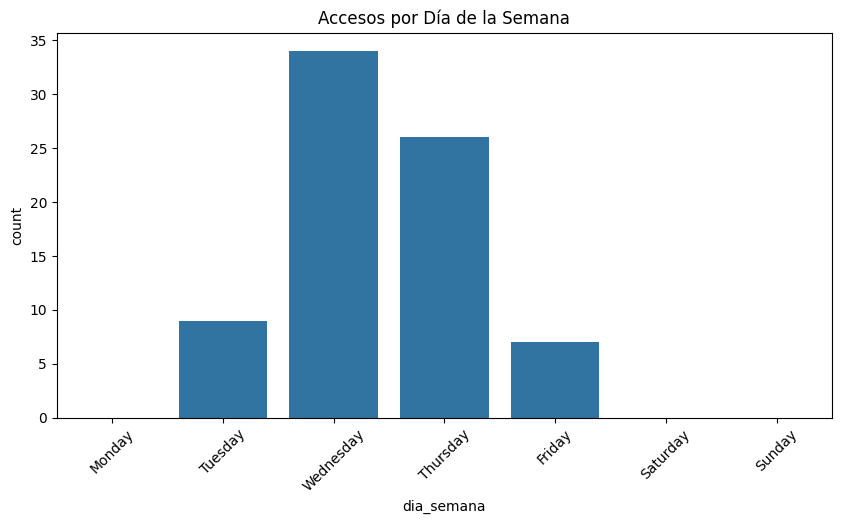

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Accesos por día
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='dia_semana', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Accesos por Día de la Semana")
plt.xticks(rotation=45)
plt.show()


### ⏰ 5. Distribución horaria de accesos (horas pico)

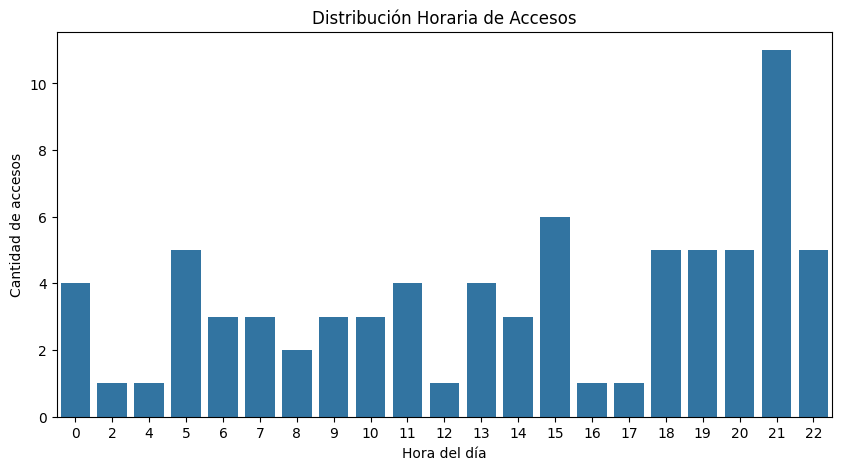

In [ ]:
# Accesos por hora
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='hora_entera')
plt.title("Distribución Horaria de Accesos")
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de accesos")
plt.show()

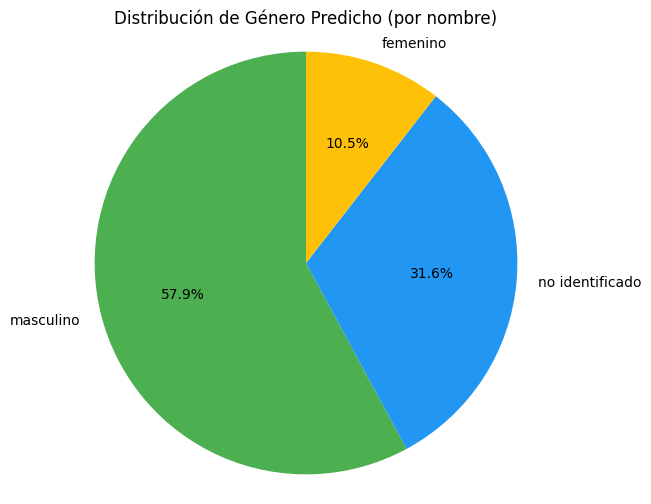

In [7]:
import matplotlib.pyplot as plt

# Contar los valores únicos del género normalizado
genero_counts = df['genero_normalizado'].value_counts()

# Crear gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(
    genero_counts,
    labels=genero_counts.index,
    autopct='%1.1f%%',
    colors=['#4CAF50', '#2196F3', '#FFC107'],  # Puedes ajustar colores si deseas
    startangle=90
)
plt.title("Distribución de Género Predicho (por nombre)")
plt.axis('equal')  # Para mantener la forma circular
plt.show()


### 🔁 6. Patrones recurrentes recurrentes

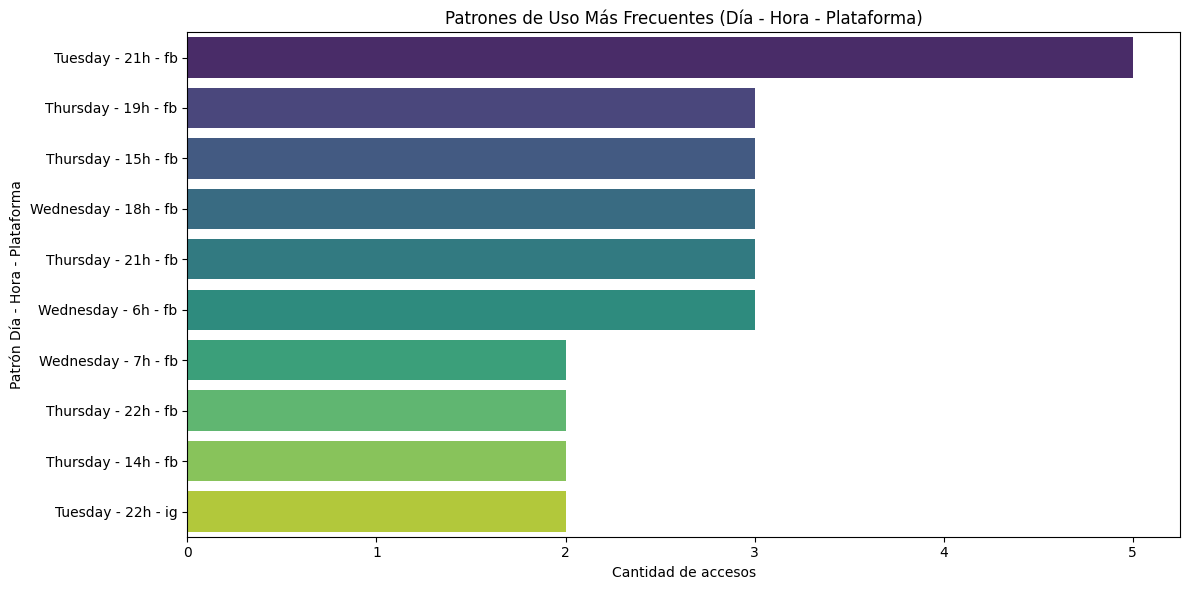

In [8]:
# Crear combinación Día-Hora-Plataforma
df['dia_hora_platform'] = df['dia_semana'] + ' - ' + df['hora_entera'].astype(str) + 'h - ' + df['platform']

# Contar ocurrencias de cada patrón
patrones_frecuentes = df['dia_hora_platform'].value_counts().head(10)

# Visualizar los patrones más repetidos
plt.figure(figsize=(12, 6))
sns.barplot(
    x=patrones_frecuentes.values,
    y=patrones_frecuentes.index,
    hue=patrones_frecuentes.index,
    palette='viridis',
    legend=False
)
plt.title("Patrones de Uso Más Frecuentes (Día - Hora - Plataforma)")
plt.xlabel("Cantidad de accesos")
plt.ylabel("Patrón Día - Hora - Plataforma")
plt.tight_layout()
plt.show()



La gráfica muestra los 10 patrones de acceso más frecuentes combinando día, hora y plataforma. El resultado indica que el mayor número de accesos se produce el martes a las 21h en Facebook.

### 🔁 7. Usuarios recurrentes

In [9]:
# Usuarios que accedieron más de una vez (nombre y apellido)
usuarios_recurrentes = df.groupby(['nombre', 'apellido']).size()
usuarios_recurrentes = usuarios_recurrentes[usuarios_recurrentes > 1]

print(f"Total de usuarios recurrentes: {len(usuarios_recurrentes)}")
usuarios_recurrentes.head()


Total de usuarios recurrentes: 0


Series([], dtype: int64)

- Los días con mayor tráfico son generalmente miercoles.
- Las horas pico de acceso se concentra entre 21:00.
- El género [no ha columna de genero] accede más frecuentemente al sistema.
- Existen 0 usuarios recurrentes que accedieron múltiples veces.
- El sistema tiene patrones que se pueden analizar con más departamentos a futuro.
